[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


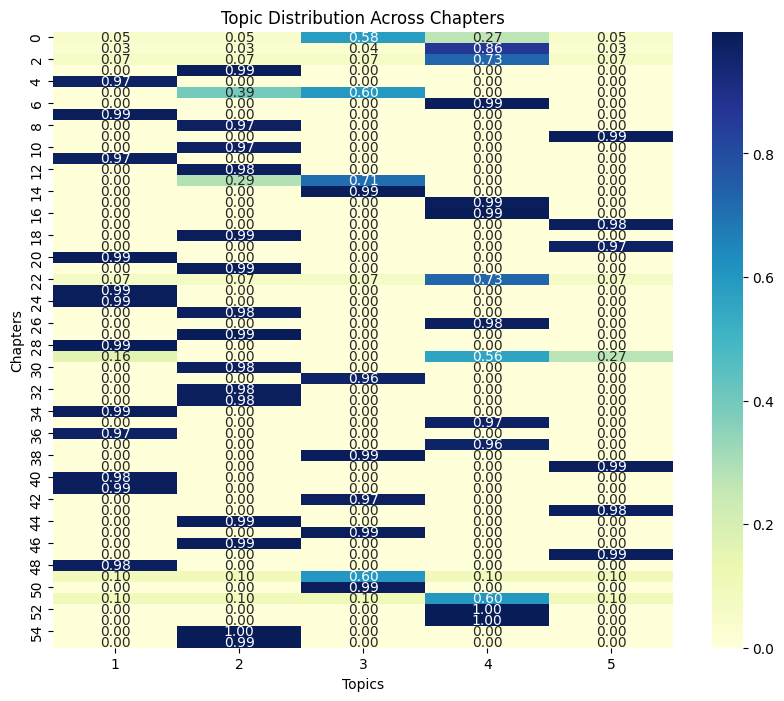

In [1]:


import nltk
nltk.download('gutenberg')

from nltk.corpus import gutenberg

import fasttext.util
fasttext.util.download_model('en', if_exists='ignore')  # English
model = fasttext.load_model('cc.en.300.bin')

from gensim.models.fasttext import FastText
import numpy as np
import fasttext
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from gensim import corpora
from gensim.models import LdaModel
from gensim.parsing.preprocessing import preprocess_string

blake_poems = gutenberg.raw("blake-poems.txt").encode('utf-8').decode('utf-8')
austen_emma = gutenberg.raw("austen-emma.txt").encode('utf-8').decode('utf-8')

# Preprocess the text and split it into lines
poem_lines = blake_poems.split('\n')
poem_lines = [line.strip() for line in poem_lines if line.strip()]

#splitting the chapters
chapters = []
current_chapter = []

for line in poem_lines:
    if line.isupper() and current_chapter:
        chapters.append(' '.join(current_chapter))
        current_chapter = []

    current_chapter.append(line)

chapters.append(' '.join(current_chapter))

# Tokenize and preprocess the text
processed_chapters = [preprocess_string(chapter) for chapter in chapters]

# Create a dictionary and a corpus
dictionary = corpora.Dictionary(processed_chapters)
corpus = [dictionary.doc2bow(chapter) for chapter in processed_chapters]

lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Specify the number of words to display for each topic (e.g., 7 words per topic)
num_words_per_topic = 7

# Extract and print the top words for each topic
topics = lda_model.print_topics(num_topics=5, num_words=num_words_per_topic)

# Calculate and print the coherence score
from gensim.models.coherencemodel import CoherenceModel


# Visualize topic distribution across chapters using a heatmap
import seaborn as sns

chapter_topic_matrix = np.zeros((len(corpus), 5))  # Initialize a matrix to store topic proportions

for i, chapter in enumerate(lda_model[corpus]):
    for topic, proportion in chapter:
        chapter_topic_matrix[i, topic] = proportion

plt.figure(figsize=(10, 8))
sns.heatmap(chapter_topic_matrix, cmap='YlGnBu', annot=True, fmt=".2f", xticklabels=range(1, 6))
plt.xlabel("Topics")
plt.ylabel("Chapters")
plt.title("Topic Distribution Across Chapters")
plt.show()

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


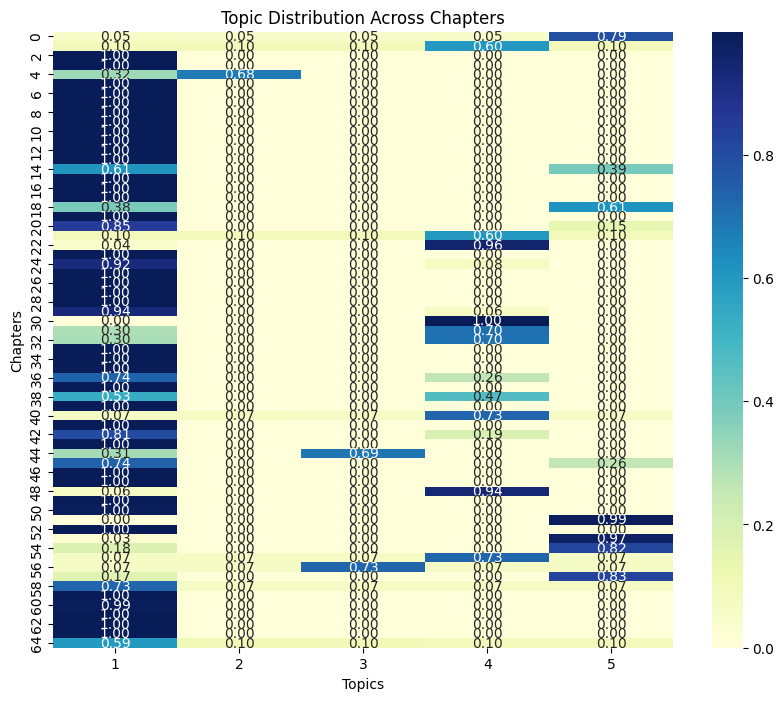

In [1]:


import nltk
nltk.download('gutenberg')

from nltk.corpus import gutenberg

import fasttext.util
fasttext.util.download_model('en', if_exists='ignore')  # English
model = fasttext.load_model('cc.en.300.bin')

from gensim.models.fasttext import FastText
import numpy as np
import fasttext
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from gensim import corpora
from gensim.models import LdaModel
from gensim.parsing.preprocessing import preprocess_string

blake_poems = gutenberg.raw("blake-poems.txt").encode('utf-8').decode('utf-8')
austen_emma = gutenberg.raw("austen-emma.txt").encode('utf-8').decode('utf-8')

# Preprocess the text and split it into lines
poem_lines = austen_emma.split('\n')
poem_lines = [line.strip() for line in poem_lines if line.strip()]

#splitting the chapters
chapters = []
current_chapter = []

for line in poem_lines:
    if line.isupper() and current_chapter:
        chapters.append(' '.join(current_chapter))
        current_chapter = []

    current_chapter.append(line)

chapters.append(' '.join(current_chapter))

# Tokenize and preprocess the text
processed_chapters = [preprocess_string(chapter) for chapter in chapters]

# Create a dictionary and a corpus
dictionary = corpora.Dictionary(processed_chapters)
corpus = [dictionary.doc2bow(chapter) for chapter in processed_chapters]

lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Specify the number of words to display for each topic (e.g., 7 words per topic)
num_words_per_topic = 7

# Extract and print the top words for each topic
topics = lda_model.print_topics(num_topics=5, num_words=num_words_per_topic)

# Calculate and print the coherence score
from gensim.models.coherencemodel import CoherenceModel


# Visualize topic distribution across chapters using a heatmap
import seaborn as sns

chapter_topic_matrix = np.zeros((len(corpus), 5))  # Initialize a matrix to store topic proportions

for i, chapter in enumerate(lda_model[corpus]):
    for topic, proportion in chapter:
        chapter_topic_matrix[i, topic] = proportion

plt.figure(figsize=(10, 8))
sns.heatmap(chapter_topic_matrix, cmap='YlGnBu', annot=True, fmt=".2f", xticklabels=range(1, 6))
plt.xlabel("Topics")
plt.ylabel("Chapters")
plt.title("Topic Distribution Across Chapters")
plt.show()